In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload

import os, sys
parentdir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parentdir)

from quanty.model import backtester as q
from quanty.model import backtester_base as q_base
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

In [2]:
db = dm.read_db(base='global_20210228.pkl', add=[])
start = '2010-12-31'
end = '2021-02-28'

# Global sector model

In [8]:
gsam = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    n_picks=5, 
    assets=setting.assets_global_sector, 
    sig_w_base=[1,0,0,0,0,0,0,0,0,0,0,0], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='ACWI', 
    cash_equiv='ACWI', #'BND_US_Tbill', 
    start=start, 
    end=end 
)

  0%|          | 0/123 [00:00<?, ?it/s]

2.901607036590576


<Figure size 432x288 with 0 Axes>

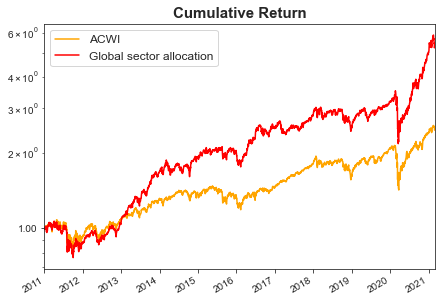

In [9]:
strats = ['ACWI', 'DualMomentum']
names = ['ACWI', 'Global sector allocation']
color = ['orange', 'r']

gsam.plot_cum(strats, names=names, color=color, logy=True);

In [10]:
gsam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Water,2.71,2557,10.23,17.90,0.57,-35.72,9.97,13.15,0.61,0.95,18.24,67.77,0.90,92.90
Solar,1.86,2557,6.25,38.89,0.16,-84.66,1.61,37.36,0.06,1.43,48.31,52.07,1.22,-79.39
Exploration,0.43,2557,-7.85,40.47,-0.19,-90.27,-9.79,33.56,-0.29,1.52,61.61,47.93,1.11,47.76
HealthcareService,4.69,2557,16.33,20.77,0.79,-35.23,18.16,16.18,1.05,0.92,16.55,65.29,1.13,94.19
DualMomentum,5.27,2557,17.66,20.76,0.85,-38.37,14.93,17.01,0.88,1.00,17.94,66.12,1.11,90.59


In [3]:
0.20*0.05

0.010000000000000002

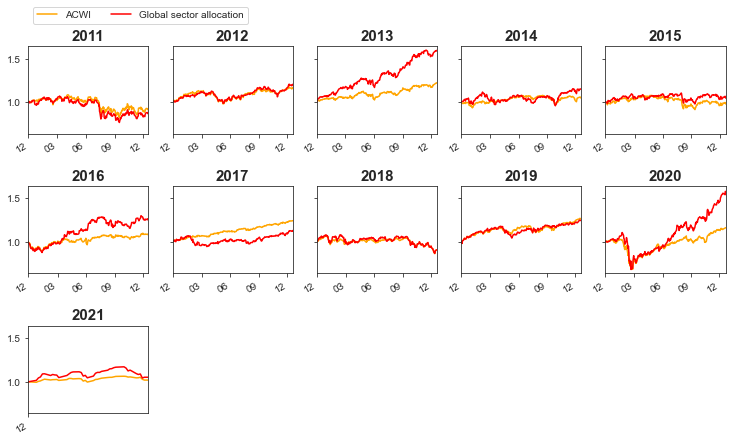

In [11]:
gsam.plot_cum_yearly(strats, names=names, color=color);#, remove=range(2003,2016));

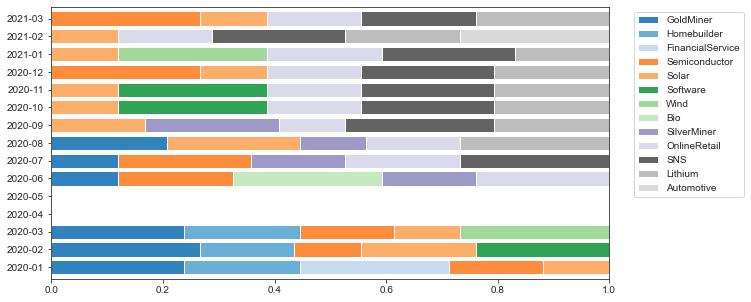

In [12]:
gsam.plot_weight([2020, 2021]);

In [10]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

Solar            0.119299
Semiconductor    0.266760
Lithium          0.206631
SNS              0.238597
OnlineRetail     0.168714
Name: 2020-11-27 00:00:00, dtype: float64

In [45]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

Solar           0.119299
Lithium         0.168714
OnlineRetail    0.206631
Wind            0.266760
SNS             0.238597
Name: 2020-12-30 00:00:00, dtype: float64

In [39]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

Solar           0.119299
Lithium         0.206631
Automotive      0.266760
SNS             0.238597
OnlineRetail    0.168714
Name: 2021-01-29 00:00:00, dtype: float64

In [47]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

Solar            0.074197
Wind             0.181746
Lithium          0.128514
Automotive       0.165910
Semiconductor    0.196308
SNS              0.148395
OnlineRetail     0.104931
Name: 2021-01-29 00:00:00, dtype: float64

In [13]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

Lithium          0.238597
SNS              0.206631
Semiconductor    0.266760
OnlineRetail     0.168714
Solar            0.119299
Name: 2021-02-26 00:00:00, dtype: float64

# US factor model

In [14]:
ufam = q.Backtester(
    setting.base_params(db), 
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    freq='M',
    assets=setting.assets_test_2, 
    sig_w_base=[1,0,0,0,0,0,0,0,0,0,0,0], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_n_sample= 21*6, 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    #follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='US', 
    supporter='US', #'BND_US_Long', 
    cash_equiv='US', #'BND_US_Tbill', 
    start=start, 
    end=end 
)

  0%|          | 0/123 [00:00<?, ?it/s]

2.6999309062957764


<Figure size 432x288 with 0 Axes>

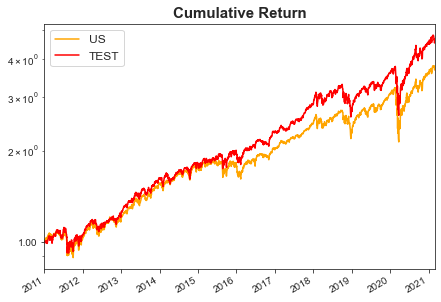

In [15]:
strats = ['US', 'DualMomentum']
names = ['US', 'TEST']
color = ['orange', 'r']

ufam.plot_cum(strats, names=names, color=color, logy=True);

In [16]:
ufam.get_stats()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Momentum,4.86,2557,16.71,18.32,0.91,-34.08,16.84,14.37,1.16,0.93,3.29,66.94,1.28,97.96
Quality,3.79,2557,13.93,16.90,0.82,-34.06,13.96,12.63,1.01,0.92,4.38,67.77,1.11,97.46
Value,2.84,2557,10.75,17.58,0.61,-37.04,10.48,13.30,0.87,0.95,16.72,66.94,0.93,92.71
ACWI,2.46,2557,9.20,17.47,0.53,-33.53,10.42,13.85,0.64,1.00,22.27,65.29,0.94,90.84
US,3.69,2557,13.62,17.10,0.80,-33.72,15.01,12.93,1.07,0.95,6.67,71.07,0.91,97.09
Growth,4.49,2557,15.82,17.64,0.90,-31.35,16.59,13.86,1.09,0.95,4.33,66.94,1.23,97.59
DualMomentum,4.54,2557,15.95,17.76,0.90,-31.02,16.14,14.24,1.08,0.94,3.38,64.46,1.36,98.07


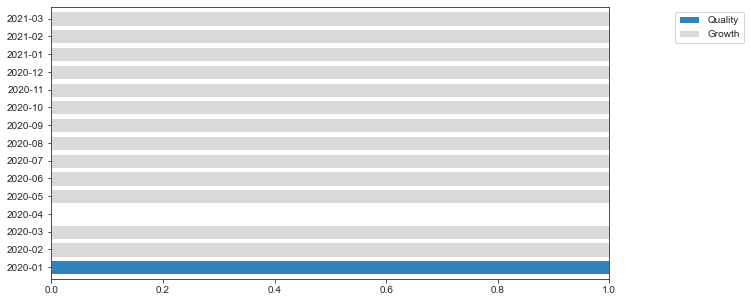

In [17]:
ufam.plot_weight([2020,2021]);

In [18]:
ufam.weight.iloc[-1][ufam.weight.iloc[-1]>0]

Growth    1.0
Name: 2021-02-26 00:00:00, dtype: float64

### Quality 기본 + 낙폭과대

In [19]:
ufam = q.Backtester(
    setting.base_params(db), 
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    freq='M',
    assets=setting.assets_test_6, 
    sig_w_base=[-1,0,0,0,0,0,-1,0,0,0,-1,1], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_n_sample= 21*6, 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    #follow_trend=(20,60), 
    #follow_trend_market=(20,60), 
    #follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='US', 
    supporter='Quality', #'BND_US_Long', 
    cash_equiv='Quality', #'BND_US_Tbill', 
    start=start, 
    end=end 
)

  0%|          | 0/123 [00:00<?, ?it/s]

2.828545093536377


<Figure size 432x288 with 0 Axes>

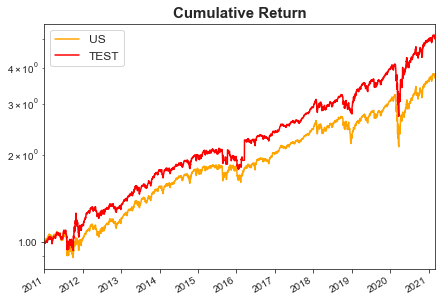

In [20]:
strats = ['US', 'DualMomentum']
names = ['US', 'TEST']
color = ['orange', 'r']

ufam.plot_cum(strats, names=names, color=color, logy=True);

In [21]:
ufam.get_stats()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Quality,3.79,2557,13.93,16.90,0.82,-34.06,13.96,12.63,1.01,0.92,4.38,67.77,1.11,97.46
HighDvd,2.98,2557,11.28,17.07,0.66,-41.59,11.55,11.26,1.00,0.85,15.34,71.07,0.88,89.11
Value,2.84,2557,10.75,17.58,0.61,-37.04,10.48,13.30,0.87,0.95,16.72,66.94,0.93,92.71
Defensive,2.87,2557,10.86,14.94,0.73,-36.53,12.00,11.08,1.14,0.75,12.39,69.42,0.96,96.25
US,3.69,2557,13.62,17.10,0.80,-33.72,15.01,12.93,1.07,0.95,6.67,71.07,0.91,97.09
Momentum_EM,1.01,2557,0.14,25.80,0.01,-59.02,0.15,21.55,0.01,0.77,49.52,58.68,0.77,-29.66
Growth,4.49,2557,15.82,17.64,0.90,-31.35,16.59,13.86,1.09,0.95,4.33,66.94,1.23,97.59
Momentum,4.86,2557,16.71,18.32,0.91,-34.08,16.84,14.37,1.16,0.93,3.29,66.94,1.28,97.96
LowBeta,3.11,2557,11.74,16.04,0.73,-37.13,11.28,11.12,1.05,0.79,9.27,71.07,0.88,91.50
HighFCF,3.70,2557,13.65,19.36,0.71,-38.63,14.04,15.44,0.93,1.01,21.06,64.46,1.08,88.12


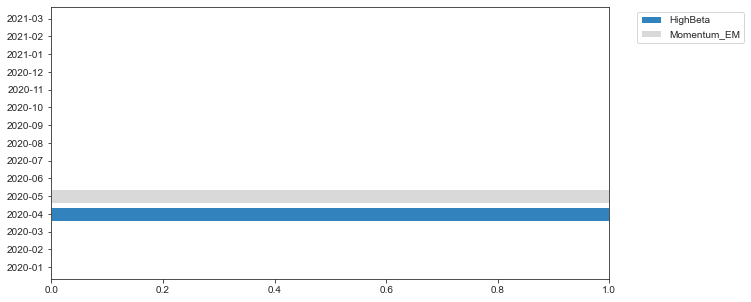

In [22]:
ufam.plot_weight([2020,2021]);

In [23]:
ufam.weight.iloc[-1][ufam.weight.iloc[-1]>0]

Quality    1.0
Name: 2021-02-26 00:00:00, dtype: float64

# US-DM-EM model

In [24]:
udem = q.Backtester(
    setting.base_params(db), 
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    assets=setting.assets_test_0, 
    sig_w_base=[1,0,0,0,0,0,0,0,0,0,0,0], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_n_sample= 21*6, 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    #follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='ACWI', #'BND_US_Long', 
    cash_equiv='ACWI', #'BND_US_Tbill', 
    start=start, 
    end=end 
)

  0%|          | 0/123 [00:00<?, ?it/s]

2.569962978363037


<Figure size 432x288 with 0 Axes>

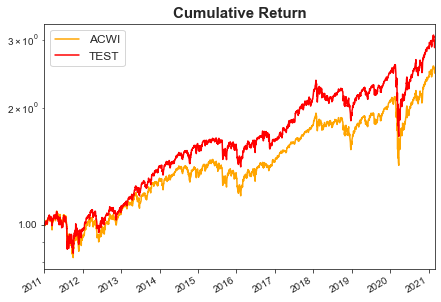

In [25]:
strats = ['ACWI', 'DualMomentum']
names = ['ACWI', 'TEST']
color = ['orange', 'r']

udem.plot_cum(strats, names=names, color=color, logy=True);

In [26]:
udem.get_stats()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Global,1.69,2557,5.25,18.56,0.28,-34.98,5.04,14.21,0.29,1.03,36.57,59.50,0.95,66.77
ACWI,2.46,2557,9.20,17.47,0.53,-33.53,10.42,13.85,0.64,1.00,22.27,65.29,0.94,90.84
US_Total,3.74,2557,13.76,17.47,0.79,-35.00,14.78,13.27,1.05,0.97,9.14,71.07,0.90,96.46
EM,1.39,2557,3.28,22.13,0.15,-38.20,2.19,19.18,0.11,1.13,43.72,51.24,1.19,-12.11
DualMomentum,2.86,2557,10.83,18.14,0.60,-34.69,11.81,15.08,0.71,1.00,17.55,66.12,0.97,94.16


In [27]:
udem.weight.tail()

,Global,ACWI,US_Total,EM
2020-10-30,0.0,0.0,1.0,0.0
2020-11-30,0.0,0.0,1.0,0.0
2020-12-31,0.0,0.0,1.0,0.0
2021-01-29,0.0,0.0,0.0,1.0
2021-02-26,0.0,0.0,1.0,0.0


# Global country 낙폭과대

In [28]:
usm = q.Backtester(
    setting.base_params(db),
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    assets=setting.assets_global_eq2, 
    sig_w_base=[-1,0,0,0,0,0,-1,0,0,0,0,1], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_n_sample= 21*6, 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    #follow_trend=(20,60), 
    #follow_trend_market=(20,60), 
    #follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='ACWI', #'BND_US_Long', 
    cash_equiv='ACWI', #'BND_US_Tbill', 
    start=start, 
    end=end
)

  0%|          | 0/123 [00:00<?, ?it/s]

2.5466551780700684


<Figure size 432x288 with 0 Axes>

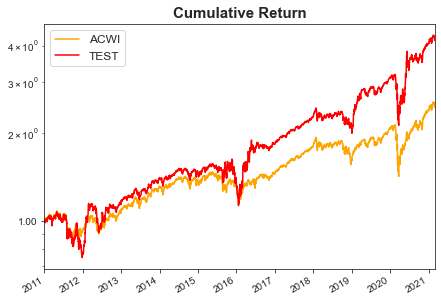

In [29]:
strats = ['ACWI', 'DualMomentum']
names = ['ACWI', 'TEST']
color = ['orange', 'r']

usm.plot_cum(strats, names=names, color=color, logy=True);

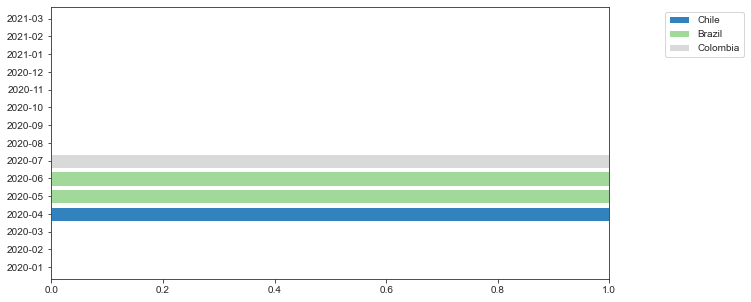

In [30]:
usm.plot_weight([2020,2021]);

In [31]:
usm.get_stats()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Canada,1.29,2557,2.53,19.45,0.13,-42.66,3.31,14.55,0.20,0.95,37.44,53.72,1.06,1.94
Ireland,2.96,2557,11.18,22.04,0.51,-46.48,9.13,16.91,0.42,0.95,31.80,58.68,1.18,72.17
UK,1.30,2557,2.58,20.23,0.13,-43.33,-0.04,14.70,-0.00,1.05,50.09,59.50,0.83,14.41
China_csi300,1.95,2557,6.77,28.17,0.24,-50.24,4.46,23.67,0.19,0.67,41.90,53.72,1.17,38.12
Turkey,0.51,2557,-6.38,33.04,-0.19,-72.34,-7.11,32.24,-0.21,1.07,61.57,50.41,0.96,68.11
ACWI,2.46,2557,9.20,17.47,0.53,-33.53,10.42,13.85,0.64,1.00,22.27,65.29,0.94,90.84
HongKong,1.88,2557,6.39,19.11,0.33,-31.08,7.26,16.65,0.42,0.82,31.20,60.33,0.94,80.38
Greece,0.65,2557,-4.14,39.64,-0.10,-79.50,-3.56,39.46,-0.11,1.16,52.04,48.76,0.93,41.03
Brazil,0.54,2557,-5.91,35.26,-0.17,-74.86,-7.13,32.29,-0.25,1.41,62.52,47.93,1.09,-20.00
France,1.78,2557,5.80,23.42,0.25,-39.23,3.15,18.98,0.13,1.20,43.76,55.37,1.11,67.05
